# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# Import the Bostoon House Price Dataset

In [ ]:
House_price_dataset=pd.read_csv("/content/Boston_Housing.csv")

In [ ]:
House_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


# checking the number of rows and Columns in the data set

In [ ]:
House_price_dataset.shape

(506, 14)

# check for missing values

In [ ]:
House_price_dataset.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
PRICE       0
CAT.MEDV    0
dtype: int64

# statistical measures of the dataset

In [ ]:
House_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,CAT.MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


# Correlation Between Various Features in the dataset


In [ ]:
correlation=House_price_dataset.corr()

# constructing a heatmap to nderstand the correlation

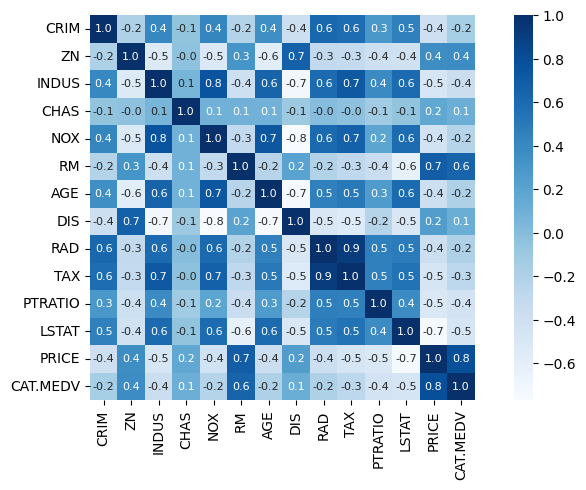

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},  cmap='Blues')
plt.show()

# Split The Dataset

In [ ]:
X=House_price_dataset.drop("PRICE",axis=1) # axis=1 means we remove specific column from dataset

In [ ]:
y=House_price_dataset["PRICE"]

In [ ]:
X.shape,y.shape

((506, 13), (506,))

# Splitting the data into Training data and Test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X.shape,X_train.shape,X_test.shape,y_test.shape

((506, 13), (404, 13), (102, 13), (102,))

# Model Training

In [ ]:
model=XGBRegressor()

# training the model

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction(Evaluation) on training data

In [ ]:
train_pred=model.predict(X_train)   # train_pred is the  'price value' predicted of our model

# R Square Error

In [ ]:
score_1=metrics.r2_score(y_train,train_pred)

# Mean Absolute Error

In [ ]:
score_2=metrics.mean_absolute_error(y_train,train_pred)

In [ ]:
print("R Square Error:",score_1)  # r squrare value close to 1 mean our model perform well.
print("Mean Absolute Error:",score_2)

R Square Error: 0.9999964632838344
Mean Absolute Error: 0.01240477679979681


# Visualizing the actual Prices and predicted prices

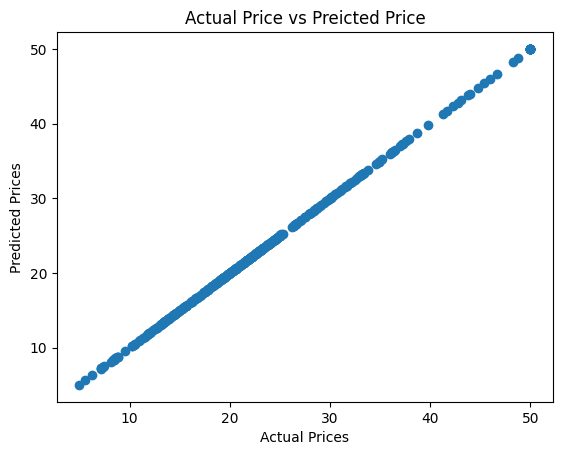

In [ ]:
plt.scatter(y_train, train_pred)   #  graph shows that 'actual values' & 'predicted values' are close to each others
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

 # Prediction on Testing Data

# predict on testing data

In [ ]:
test_pred=model.predict(X_test)

# R Square Error

In [ ]:
score1=metrics.r2_score(y_test,test_pred)

# Mean Absolute Error

In [ ]:
score2=metrics.mean_absolute_error(y_test,test_pred)

In [ ]:
print("R Square Error:",score1)
print(" Mean Absolute Error:",score2)

R Square Error: 0.9240822850080517
 Mean Absolute Error: 1.740404631109799


# Make Predictive System(To Detect Price Of House)

In [ ]:
# Creating a new data point
pred_price = np.array([[0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 4.98, 0]])

# Making prediction
prediction = model.predict(pred_price)
print(prediction)



[25.727234]


In [ ]:
print(y_test[0])  # here our model predict well(our original value is 24 & model predict 25)

24.0
